In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [53]:
# Import data
df = pd.read_csv("train.csv")

df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index)

In [54]:
# Remove all columns with > 15% missing values 
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([percent], axis=1, keys=['Missing value percent'])
missing_data.head(100)

,Missing value percent
PoolQC,0.995885
MiscFeature,0.962963
Alley,0.937586
Fence,0.807270
FireplaceQu,0.473251
...,...
CentralAir,0.000000
SaleCondition,0.000000
Heating,0.000000
TotalBsmtSF,0.000000


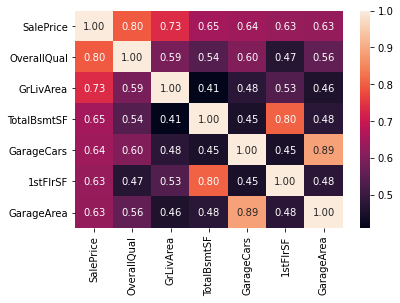

In [55]:
corrmat = df.corr()
saleprice_corr_index = corrmat['SalePrice'].nlargest(7).index
saleprice_corrmat = df[saleprice_corr_index].corr() # sale price correlation matrix
sns.heatmap(saleprice_corrmat, cbar=True, annot=True, fmt='.2f')

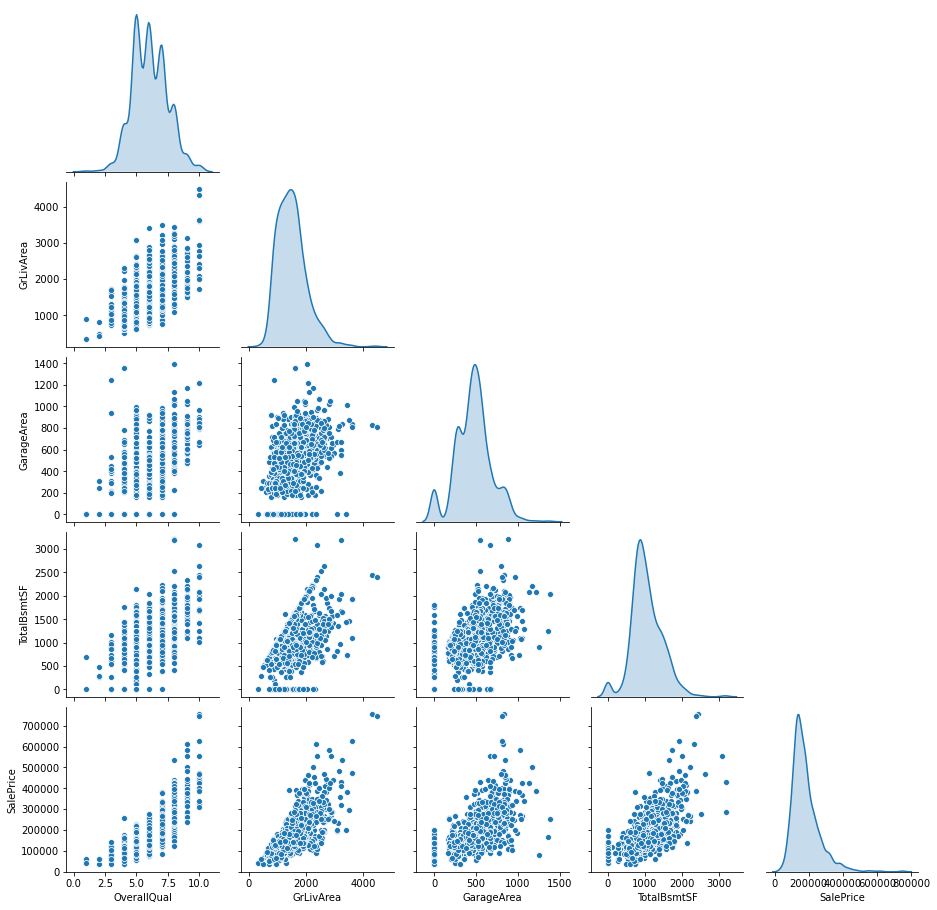

In [56]:
cols = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'SalePrice']
sns.pairplot(df[cols],corner=True, diag_kind="kde")